In [3]:
# first call the data and make it data frame

import pandas as pd

file_path = r'G:\My Drive\AI 701 project\For Python\2022 training set_clean_good.xlsx'  
sheet_name = 'For Python'  

# Load the 2022 file
data22 = pd.read_excel(file_path, sheet_name=sheet_name)


tfile_path = r'G:\My Drive\AI 701 project\2023 for testing.xlsx'  
tsheet_name = 'Clean'  

# Load the 2023 file
data23 = pd.read_excel(tfile_path, sheet_name=tsheet_name)



In [4]:
#Pick the desired Columns
Selected = ['C1','Sulphur','NGL','Feed O ', 'Feed B', 'Feed S', 'Feed K','Feed I','Feed N']
data23_s = data23[Selected].copy()
data22_s = data22[Selected].copy()


In [6]:
#add in 2021 and 2024, and fix the data in a similar sense.
onefile_path = r'G:\My Drive\AI 701 project\2021 daily actuals clean.xlsx'  
onesheet_name = 'Clean'  

# Load the 2021 file
data21 = pd.read_excel(onefile_path, sheet_name=onesheet_name)



ffile_path = r'G:\My Drive\AI 701 project\2024 daily actuals clean.xlsx'  
fsheet_name = 'Clean'  

# Load the 2024 file
data24 = pd.read_excel(ffile_path, sheet_name=fsheet_name)

# some data manipulations to fit our model.


data24 = data24.iloc[:, :13] #remove plant X data
data21 = data21.iloc[:, :13] #remove plant X data

data24.columns = data24.iloc[0]  # Set the first row as the column names
data24 = data24[2:]  # Remove the first row as it's now the header, and 2nd row which is units

# Reset index if needed
data24.reset_index(drop=True, inplace=True)

data21.columns = data21.iloc[0]  # Set the first row as the column names
data21 = data21[2:]  # Remove the first row as it's now the header, and 2nd row which is units

# Reset index if needed
data21.reset_index(drop=True, inplace=True)

#rename the columns same as 2023 and 2023
data24.rename(columns={'NGL\n': 'NGL'}, inplace=True)
data24.rename(columns={'C1\n': 'C1'}, inplace=True)

data21.rename(columns={'NGL\n': 'NGL'}, inplace=True)
data21.rename(columns={'C1\n': 'C1'}, inplace=True)

data21.rename(columns={'Feed O': 'Feed O '}, inplace=True) #need to add the space
data24.rename(columns={'Feed O': 'Feed O '}, inplace=True)


In [7]:
data21_s = data21[Selected].copy()
data24_s = data24[Selected].copy()

print(data21_s.columns)
print(data24_s.columns)

print(data21_s.shape)
print(data24_s.shape)

Index(['C1', 'Sulphur', 'NGL', 'Feed O ', 'Feed B', 'Feed S', 'Feed K',
       'Feed I', 'Feed N'],
      dtype='object', name=0)
Index(['C1', 'Sulphur', 'NGL', 'Feed O ', 'Feed B', 'Feed S', 'Feed K',
       'Feed I', 'Feed N'],
      dtype='object', name=0)
(365, 9)
(141, 9)


In [8]:
#combine 22 and 23 for one big data #I now added 2021 and 2024

data1 = pd.concat([data22_s, data23_s, data21_s, data24_s], ignore_index=True)
print(data1.columns)
print(data1.shape)
#print(data1.head)
print(data1['Feed O '])

Index(['C1', 'Sulphur', 'NGL', 'Feed O ', 'Feed B', 'Feed S', 'Feed K',
       'Feed I', 'Feed N'],
      dtype='object')
(1233, 9)
0       200
1       203
2       201
3       202
4       200
       ... 
1228    175
1229    195
1230    172
1231    173
1232      0
Name: Feed O , Length: 1233, dtype: object


In [9]:
import numpy as np

# Count NaN values
nan_count = data1.isna().sum().sum()  # Total NaNs
print(f"Total NaN values: {nan_count}")

# Count -ve
negative_count = (data1 < 0).sum().sum()  # Total zeros
print(f"Total -ve values: {negative_count}")

negative_per_column = (data1 < 0).sum()
print("Negative values per column:")
print(negative_per_column)

data1[data1 < 0] = 0
negative_count = (data1 < 0).sum().sum()  # Total zeros
print(f"Total -ve values: {negative_count}")



Total NaN values: 0
Total -ve values: 34
Negative values per column:
C1         27
Sulphur     0
NGL         6
Feed O      0
Feed B      0
Feed S      0
Feed K      0
Feed I      1
Feed N      0
dtype: int64
Total -ve values: 0


In [10]:
#Now for Each product, do the adjustment and then drop the negatives. (C1 is main culrpit)
# Known weights for C1 and Sulphur

c1_weights = np.array([0.84, 0.72, 0.84, 0.70])
s_weights = np.array([0.90, 1.55, 2, 0])
ngl_weights = np.array([2.49,7.8,2,9.47])

data1['C1_adj'] = data1['C1'] - np.dot(data1[['Feed I', 'Feed B', 'Feed S', 'Feed K']].values, c1_weights)
data1['Sulphur_adj'] = data1['Sulphur'] - np.dot(data1[['Feed I', 'Feed B', 'Feed S', 'Feed K']].values, s_weights)
data1['NGL_adj'] = data1['NGL'] - np.dot(data1[['Feed I', 'Feed B', 'Feed S', 'Feed K']].values, ngl_weights)

negative_per_column = (data1 < 0).sum()
print("Negative values per column:")
print(negative_per_column)


Negative values per column:
C1               0
Sulphur          0
NGL              0
Feed O           0
Feed B           0
Feed S           0
Feed K           0
Feed I           0
Feed N           0
C1_adj         392
Sulphur_adj    187
NGL_adj         32
dtype: int64


In [11]:
data_cluster=data1[['C1', 'Sulphur', 'NGL', 'Feed O ', 'Feed B', 'Feed S', 'Feed K','Feed N',
       'Feed I']]
data_cluster.head

<bound method NDFrame.head of         C1 Sulphur    NGL Feed O  Feed B   Feed S Feed K   Feed N Feed I
0     1080    1944  11446     200    303    180.0      0   163.51    542
1     1069    1951  11476     203    302    183.0      0  160.636    544
2     1078    2278  11656     201    301    190.0      0  161.996    519
3     1137    2431  11442     202    301    191.0      0  163.799    564
4     1135    2532   9582     200    301    191.0      0  163.584    477
...    ...     ...    ...     ...    ...      ...    ...      ...    ...
1228  1044    2224  12519     175    238  564.308    148  161.078    438
1229  1064    1125  12778     195    253  560.778    152  161.495    531
1230  1057    3224  13049     172    242   555.51    126  158.545    587
1231  1088    2099  12634     173    262  559.843    155   158.43    656
1232  1092    2021  12657       0    277  556.569    146  158.924    589

[1233 rows x 9 columns]>

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Create DataFrame
df = pd.DataFrame(data_cluster)

# Calculate total feed volume per day
df['Total Feed'] = df[['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']].sum(axis=1)

# Calculate proportions of each feed
for feed in ['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']:
    df[f'{feed}_Prop'] = df[feed] / df['Total Feed']

# Calculate production contributions for each feed
for feed in ['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']:
    df[f'{feed}_C1'] = df[f'{feed}_Prop'] * df['C1']
    df[f'{feed}_Sulphur'] = df[f'{feed}_Prop'] * df['Sulphur']
    df[f'{feed}_NGL'] = df[f'{feed}_Prop'] * df['NGL']

# Initialize feeds_transposed with feeds as rows
feeds_transposed = pd.DataFrame(index=['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I'])

feeds_transposed

""
Feed O
Feed B
Feed S
Feed K
Feed N
Feed I


In [13]:
df.columns
df[['Feed S_C1']]

,Feed S_C1
0,140.006194
1,140.472457
2,149.177419
3,152.740999
4,162.680176
...,...
1228,341.650623
1229,321.953534
1230,318.933476
1231,310.093955


In [14]:
# Aggregate contributions for each feed
for product in ['C1', 'Sulphur', 'NGL']:
    feeds_transposed[product] = [
        df[f'{feed}_{product}'].sum() for feed in ['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']
    ]
feeds_transposed


,C1,Sulphur,NGL
Feed O,144746.245152,3.021006e+05,1.564295e+06
Feed B,210784.108176,4.404025e+05,2.212813e+06
Feed S,282213.619009,5.782665e+05,3.124528e+06
Feed K,29330.294139,5.965999e+04,3.128632e+05
Feed N,127044.998305,2.621041e+05,1.350816e+06
Feed I,496621.735219,1.046820e+06,5.122191e+06


In [15]:


# Aggregate feed volumes
feeds_transposed['Mean Volume'] = df[['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']].mean(axis=0).values
feeds_transposed['Std Volume'] = df[['Feed O ', 'Feed B', 'Feed S', 'Feed K', 'Feed N', 'Feed I']].std(axis=0).values

# Handle NaN values
feeds_transposed.fillna(0, inplace=True)  # Replace NaNs with 0
print("NaN values after handling:", feeds_transposed.isna().sum())

# Combine features for clustering
clustering_features = feeds_transposed[['Mean Volume', 'Std Volume', 'C1', 'Sulphur', 'NGL']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)





NaN values after handling: C1             0
Sulphur        0
NGL            0
Mean Volume    0
Std Volume     0
dtype: int64


In [16]:
clustering_features

,Mean Volume,Std Volume,C1,Sulphur,NGL
Feed O,176.164639,48.84397,144746.245152,3.021006e+05,1.564295e+06
Feed B,248.124899,84.577093,210784.108176,4.404025e+05,2.212813e+06
Feed S,349.162797,161.044612,282213.619009,5.782665e+05,3.124528e+06
Feed K,39.197891,43.664933,29330.294139,5.965999e+04,3.128632e+05
Feed N,151.47441,39.611925,127044.998305,2.621041e+05,1.350816e+06
Feed I,599.69262,201.715549,496621.735219,1.046820e+06,5.122191e+06


Final Clustered Feeds Transposed:
                     C1       Sulphur           NGL Mean Volume  Std Volume  \
Feed O   144746.245152  3.021006e+05  1.564295e+06  176.164639    48.84397   
Feed B   210784.108176  4.404025e+05  2.212813e+06  248.124899   84.577093   
Feed S   282213.619009  5.782665e+05  3.124528e+06  349.162797  161.044612   
Feed K    29330.294139  5.965999e+04  3.128632e+05   39.197891   43.664933   
Feed N   127044.998305  2.621041e+05  1.350816e+06   151.47441   39.611925   
Feed I   496621.735219  1.046820e+06  5.122191e+06   599.69262  201.715549   

         Cluster  
Feed O         1  
Feed B         1  
Feed S         0  
Feed K         1  
Feed N         1  
Feed I         0  


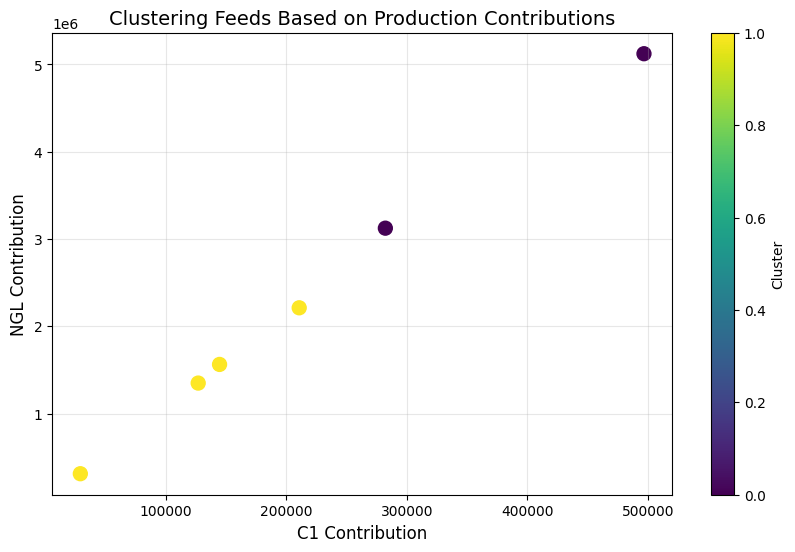

In [20]:

# Perform clustering
kmeans = KMeans(n_clusters=2, random_state=42)
feeds_transposed['Cluster'] = kmeans.fit_predict(scaled_features)

# Debug: Check final clustered DataFrame
print("Final Clustered Feeds Transposed:\n", feeds_transposed)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    feeds_transposed['C1'],
    feeds_transposed['NGL'],
    c=feeds_transposed['Cluster'],
    cmap='viridis',
    s=100
)
plt.xlabel('C1 Contribution', fontsize=12)
plt.ylabel('NGL Contribution', fontsize=12)
plt.title('Clustering Feeds Based on Production Contributions', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.show()


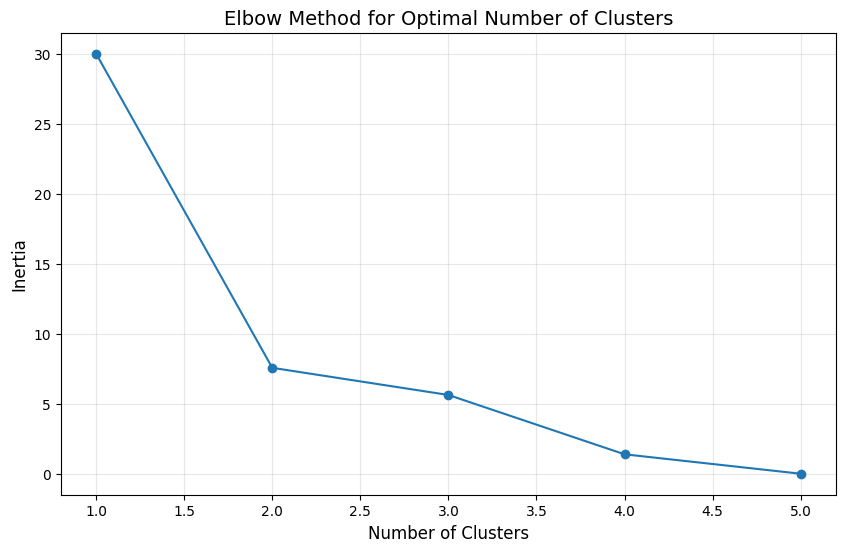

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method to determine the optimal number of clusters
inertias = []
cluster_range = range(1, 6)  # Test 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.grid(alpha=0.3)
plt.show()
